In [ ]:
import matplotlib.pyplot as plt
from utils import *
import plotly.express as px

In [ ]:
!python -m serial.tools.list_ports

# Drift and Hysteresis Analysis

## Measurements

In [ ]:
port = "/dev/ttyUSB1"
df = read_measurements_df(port=port, duration=60*5, calibration=False)
#for i in range(12*30):
#    df = pd.concat([df, read_measurements_df(port=port, duration=5, calibration=False)], ignore_index=True)

In [25]:
df['timestamp'] = df['timestamp'] - df['timestamp'][0]
df.to_csv("data/test_7.csv", index=False)

In [26]:
df  = pd.read_csv("data/test_7.csv")
fig = px.line(df, x=df.timestamp, y=[f"sensor_{i}" for i in range(1,7)], title='Drift and hysteresis analysis (unmounted)')
fig.write_html('data/test_7.html', auto_open=True)

## Analysis Test 5
An approximately 6 min long experiment was made to obtain an initial feeling of the drift and hysteresis from the sensors. This is important to obtain the values of the sensor when the batbot is not mounted, as our goal should be to emulate this sensor values (or use them to calibrate to zero). The experiment (test_5.csv) consisted on manually (literally with the hand) applying force on the 6 axis direction. From the mounted Batbot perspective I will call this axis; front, left, back, right, and down. The forces were applied in this respective order. The forces were applied for approx. 5 seconds and then there were 55 seconds of waiting. This way we can analyse 2 things, is there a considerable drift? Meaning, is there a considerable change in the sensor value from the beginning of a waiting period to the end of it. And are there considerable hysteresis? Which can be calculated through the difference of the sensor value in waiting phase before and after the force application phase. **CAREFUL: The results of this analysis are preliminary, the experiment should be repeated using more realistic forces than my hand pushing and pulling the structure around. For example using real movements of the Batbot.**

In [ ]:
df  = pd.read_csv("data/test_5.csv")

First the waiting intervals are manually determined using the pyplot graph as a reference

In [ ]:
intervals = {'initial': {'range':(0, 61.5)}, 'post_front': {'range':(70.95, 122.81)}, 'post_left': {'range':(131.53, 181.2)},
             'post_back': {'range':(189.89, 242.21)}, 'post_right': {'range':(250.4, 302.25)}, 'post_up': {'range':(309.78, 362.69)},
             'post_down': {'range':(369.79, 425.58)}}

### Drift

In [ ]:
interval_values = {}
for interval in intervals:
    intervals[interval]['values'] = df[(df['timestamp']>intervals[interval]['range'][0])&(df['timestamp']<intervals[interval]['range'][1])].reset_index(drop=True)
    intervals[interval]['drift'] = intervals[interval]['values'].iloc[0] - intervals[interval]['values'].iloc[-1]
    intervals[interval]['mean'] = intervals[interval]['values'].mean().drop('timestamp')
    print(f"Interval {interval} drift:\n {intervals[interval]['drift'].drop('timestamp')}\n")

Conclusion: We can see that for a minute-long experiment (which is significantly longer than the 5-15 second experiments I plan to do) the drift is in the 10⁻³ range. Which means that the drift can be neglected.

### Hysteresis

In [ ]:
df_sit =[]
for interval in intervals:
    df_sit.append(intervals[interval]['mean'])

df_hist = pd.DataFrame(df_sit)

Considering that the range of the sensor goes from approx. (-4,4)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
df_hist.plot.box(ax=ax1)
ax1.set_ylim((-4,4))

df_hist.plot.box(ax=ax2)
plt.show()

In [ ]:
ranges = (df.max(axis=0) - df.min(axis=0)).drop('timestamp')
ranges

In [ ]:
neut_ranges  = df_hist.max(axis=0) - df_hist.min(axis=0)
neut_ranges

In [ ]:
# Percentage maximum error
neut_ranges/ranges

Conclusion: The range of the distributions obtained from the different sensor reading in neutral state (no force applied) appears to be small. With the largest difference being from the sensor 6 with only a 0.116 max difference. Nevertheless, when taking in consideration that the sensor have different measurements ranges, sensor 3 and 2 have a very large relative difference of 14% and 16% respectively. This is due to the small measurement range of these sensors (0.02 and 0.04). This may be due to the fact that the Batbot is positioned exactly vertically from these sensors (which calculate forces in the horizontal axis). A solution could be to move the Batbot to the center of the sensor positions with respect to the horizontal plane.

## Analysis Test 6
Repetition of Test 5 but another day to ensure values remaining constant.

Interval initial drift:
 sensor_1   -0.000783
sensor_2   -0.000009
sensor_3    0.000068
sensor_4    0.000083
sensor_5    0.000492
sensor_6   -0.000886
dtype: float64

Interval post_front drift:
 sensor_1   -0.001042
sensor_2    0.000024
sensor_3   -0.000009
sensor_4    0.000271
sensor_5    0.000699
sensor_6    0.000775
dtype: float64

Interval post_left drift:
 sensor_1    0.000574
sensor_2    0.000022
sensor_3    0.000053
sensor_4    0.000272
sensor_5   -0.001952
sensor_6    0.000343
dtype: float64

Interval post_back drift:
 sensor_1    0.002678
sensor_2    0.000072
sensor_3   -0.000230
sensor_4   -0.001198
sensor_5   -0.001204
sensor_6    0.001158
dtype: float64

Interval post_right drift:
 sensor_1    0.001167
sensor_2   -0.000050
sensor_3    0.000000
sensor_4   -0.000598
sensor_5    0.002310
sensor_6    0.000211
dtype: float64

Interval post_up drift:
 sensor_1    0.000730
sensor_2   -0.000063
sensor_3    0.000269
sensor_4    0.000675
sensor_5    0.001695
sensor_6    0.001461
dtyp

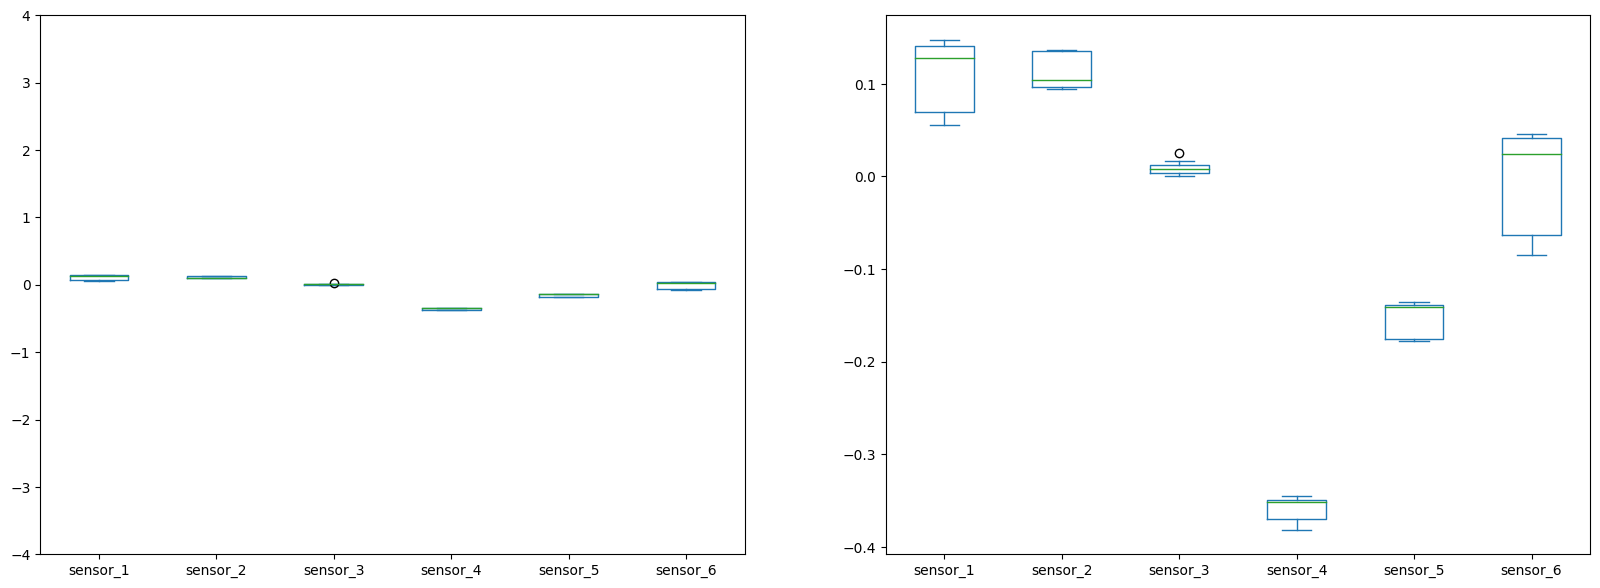

In [32]:
df  = pd.read_csv("data/test_6.csv")
intervals = {'initial': {'range':(0, 55)}, 'post_front': {'range':(66, 113)}, 'post_left': {'range':(123, 174)},
             'post_back': {'range':(183, 234)}, 'post_right': {'range':(243, 292)}, 'post_up': {'range':(303, 355)},
             'post_down': {'range':(363, 518)}}
interval_values = {}
for interval in intervals:
    intervals[interval]['values'] = df[(df['timestamp']>intervals[interval]['range'][0])&(df['timestamp']<intervals[interval]['range'][1])].reset_index(drop=True)
    intervals[interval]['drift'] = intervals[interval]['values'].iloc[0] - intervals[interval]['values'].iloc[-1]
    intervals[interval]['mean'] = intervals[interval]['values'].mean().drop('timestamp')
    print(f"Interval {interval} drift:\n {intervals[interval]['drift'].drop('timestamp')}\n")

df_sit =[]
for interval in intervals:
    df_sit.append(intervals[interval]['mean'])

df_hist = pd.DataFrame(df_sit)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
df_hist.plot.box(ax=ax1)
ax1.set_ylim((-4,4))
df_hist.plot.box(ax=ax2)
plt.show()

In [ ]:
ranges = (df.max(axis=0) - df.min(axis=0)).drop('timestamp')
ranges

In [ ]:
neut_ranges  = df_hist.max(axis=0) - df_hist.min(axis=0)
neut_ranges
neut_ranges/ranges

## Analysis 7
Same Analysis as last two, with the only difference that more random perturbations were made at different intervals of time and also some torque was tried (again, everything simply with the hand.

Interval interval_0 drift:
 sensor_1   -0.000034
sensor_2    0.000027
sensor_3    0.000000
sensor_4    0.000022
sensor_5    0.000002
sensor_6   -0.000021
dtype: float64

Interval interval_1 drift:
 sensor_1    0.000609
sensor_2    0.000242
sensor_3    0.000155
sensor_4   -0.000792
sensor_5   -0.000345
sensor_6    0.000962
dtype: float64

Interval interval_2 drift:
 sensor_1    0.000226
sensor_2   -0.000202
sensor_3   -0.000065
sensor_4    0.000462
sensor_5    0.000681
sensor_6   -0.000307
dtype: float64

Interval interval_3 drift:
 sensor_1    0.000229
sensor_2    0.000063
sensor_3    0.000311
sensor_4   -0.000333
sensor_5    0.001532
sensor_6    0.000012
dtype: float64

Interval interval_4 drift:
 sensor_1    0.000035
sensor_2   -0.000068
sensor_3    0.000570
sensor_4   -0.000774
sensor_5    0.000386
sensor_6   -0.000099
dtype: float64

Interval interval_5 drift:
 sensor_1    0.000512
sensor_2   -0.000010
sensor_3    0.000203
sensor_4    0.000198
sensor_5    0.000110
sensor_6   -0.000

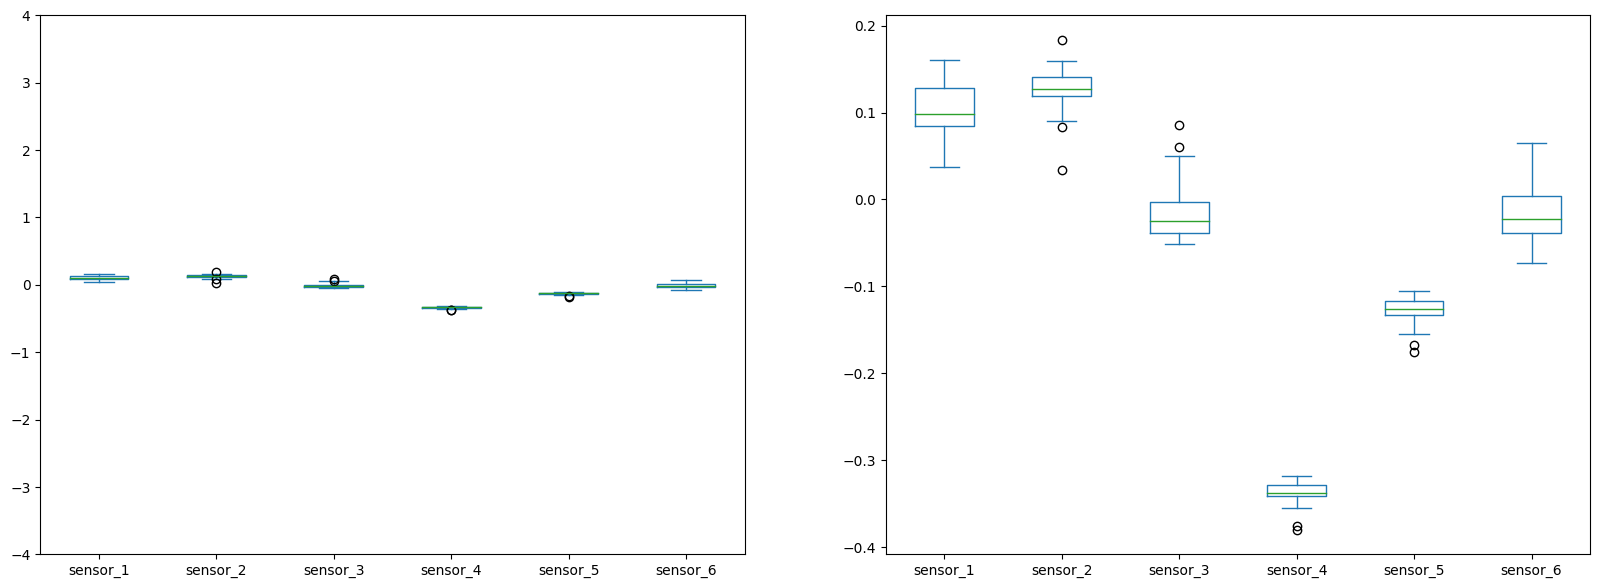

In [37]:
df  = pd.read_csv("data/test_7.csv")
ranges =  [(0,3.6), (9.5,13.17), (17.53, 22.05), (26.59, 30.61), (36.61, 41.94), (49.28, 55.77), (63.43, 67.91), (74.15, 80.38), (86.16, 90.17), (95.92, 102.66), (110.80, 117.65), (121.03, 126.79), (133.86, 140.70), (148.42, 150.59), (159.52, 160.92), (163.5, 169), (178.58, 184.45), (192.4, 202.12), (206.73, 212.91), (221.79, 223.53), (225.64, 228.28), (238.07, 243.24), (251.68, 253.49), (260.42, 264.29), (269.11, 273.20), (278.6, 280.95), (286.6, 288.74), (293.62, 295.14)]

intervals = {}
for i, tup in enumerate(ranges):
    intervals[f'interval_{i}'] = {'range':tup}

interval_values = {}
for interval in intervals:
    intervals[interval]['values'] = df[(df['timestamp']>intervals[interval]['range'][0])&(df['timestamp']<intervals[interval]['range'][1])].reset_index(drop=True)
    intervals[interval]['drift'] = intervals[interval]['values'].iloc[0] - intervals[interval]['values'].iloc[-1]
    intervals[interval]['mean'] = intervals[interval]['values'].mean().drop('timestamp')
    print(f"Interval {interval} drift:\n {intervals[interval]['drift'].drop('timestamp')}\n")

df_sit =[]
for interval in intervals:
    df_sit.append(intervals[interval]['mean'])

df_hist = pd.DataFrame(df_sit)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
df_hist.plot.box(ax=ax1)
ax1.set_ylim((-4,4))
df_hist.plot.box(ax=ax2)
plt.show()

In [38]:
ranges = (df.max(axis=0) - df.min(axis=0)).drop('timestamp')
ranges

sensor_1    3.485403
sensor_2    1.543123
sensor_3    1.121311
sensor_4    7.852253
sensor_5    4.781016
sensor_6    5.203960
dtype: float64

In [39]:
neut_ranges  = df_hist.max(axis=0) - df_hist.min(axis=0)
neut_ranges
neut_ranges/ranges

sensor_1    0.035321
sensor_2    0.097172
sensor_3    0.122651
sensor_4    0.007947
sensor_5    0.014722
sensor_6    0.026425
dtype: float64

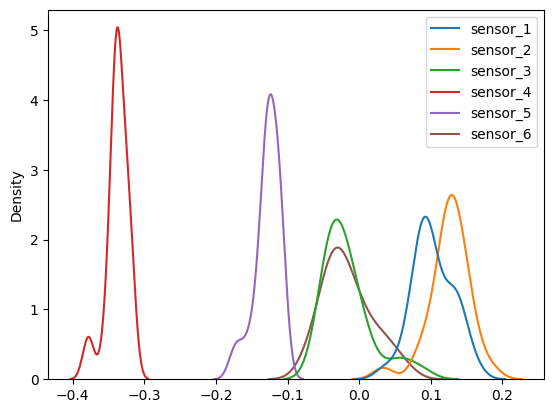

In [45]:
import seaborn as sns
sns.kdeplot(df_hist)
plt.show()

In [46]:
df_hist.mean()

sensor_1    0.103034
sensor_2    0.126191
sensor_3   -0.016099
sensor_4   -0.337834
sensor_5   -0.127773
sensor_6   -0.016209
dtype: float64

Conclusion: For the time being I believe the mean values of df_dist from test_7 can be used as the sensors shift for further experimentation. The values relate with the experiments 5 and 6.